### About the Dataset
The dataset consists of 468 official publications from British India, mainly from 1850-1950, that report on public health, disease mapping, vaccination efforts, veterinary experiments, and other medical topics. The publications are a subset of a larger collection of 40,000 volumes that report on the administration of British India. The Wellcome Trust funded the digitisation of the medical history volumes in this dataset.



In [30]:
# to access files for cleaning
import os, ssl 
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

# Libraries for data loading
import pandas as pd  # For dataframe analysis
import numpy as np  # For dataframe analysis
import string
import re  # Regix to remove punctuation from strings I split

# Libraries for visualization
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Libraries for text analysis
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
from nltk.corpus import PlaintextCorpusReader
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
nltk.download('tagsets')  # part of speech tags
from nltk.draw.dispersion import dispersion_plot as displt


#Libraries for advanced text processing
from nltk.util import ngrams
from collections import Counter
nltk.download('averaged_perceptron_tagger')
from shutil import copyfile # For copying clean files
from sklearn.feature_extraction.text import CountVectorizer # For creating document-term matrix & excluding stop words
from sklearn.feature_extraction import text # For getting stop words
from wordcloud import WordCloud # For creating word clouds
from textblob import TextBlob # For sentiment analysis

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tamaralottering/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tamaralottering/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tamaralottering/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tamaralottering/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/tamaralottering/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [4]:
pwd

'/Users/tamaralottering/Desktop'

In [6]:
#create a corpus from all texts and tokenize
corpus_folder = '/Users/tamaralottering/Desktop/nls-text-indiaPapers/'
wordlists = PlaintextCorpusReader(corpus_folder, '\d.*', encoding='latin1')
corpus_tokens = wordlists.words()
print(corpus_tokens[:10])

['No', '.', '1111', '(', 'Sanitary', '),', 'dated', 'Ootacamund', ',', 'the']


In [8]:
# what are the words around 'India'
t = Text(corpus_tokens)
t.concordance('India', lines=20)  # by default NLTK's concordance method displays 25 lines

Displaying 20 of 16495 matches:
ffg . Secretary to the Government of India . Resolution of Government of India 
 India . Resolution of Government of India No . 1 - 137 , dated 5th March 1875 
rch 1875 . Letter from Government of India No . 486 , dated 5th September 1876 
ember 1876 . Letter to Government of India No . 1063 , dated 26th ditto . REFER
ffg . Secretary to the Government of India , Home Department . REFERRING to par
 to paragraph 8 of the Government of India ' s Resolu - tion No . 1 - 136 , dat
inion expressed by the Government of India that any measures of segragation and
filth with which all the villages in India are surrounded is quite sufficient t
the disease in Rajputana and Central India are in the hands of the Presidency S
ffg . Secretary to the Government of India , Home Dept . IN continuation of my 
 the Resolution of the Government of India , Home Department ( Medical ), No 1 
d by the orders of the Government of India dated 5th March 1876 . Report on lep
e to the

In [9]:
# what are the words around 'Britain'
t = Text(corpus_tokens)
t.concordance('Britain', lines=20)  # by default NLTK's concordance method displays 25 lines

Displaying 20 of 163 matches:
untries . The mor - tality in Great Britain was heavier in 1833 , 1849 , 1854 ,
 ploughed lands as is done in Great Britain . ( a .) Flat ... - ( b .) Hilly ..
area nearly twice as great as Great Britain and Ireland , an idea may be formed
 not in so great demand as in Great Britain and Ireland , nor , owing to ( 17 )
 use of for this purpose . In Great Britain it is customary to calculate the po
 - appearance of malaria from Great Britain was the gradual adoption of efficie
question of state medicine as Great Britain with her colonies . Besides the mag
quired for poisonous drugs in Great Britain would be an unqualified blessing to
ue was fast disappearing from Great Britain and the neighbouring countries . 19
similar action on the part of Great Britain were to be taken in the manner that
ess of the Consuls General of Great Britain and the United States , to intervie
r - ed for poisonous drugs in Great Britain , would be an unqualified blessing 
 by the me

### Corpus Statistics Summary

In [10]:
def corpusStatistics(plaintext_corpus_read_lists):
    total_tokens = 0
    total_sents = 0
    total_files = 0
    for fileid in plaintext_corpus_read_lists.fileids():
        total_tokens += len(plaintext_corpus_read_lists.words(fileid))
        total_sents += len(plaintext_corpus_read_lists.sents(fileid))
        total_files += 1
    print("Total...")
    print("  Tokens in MHBI Data:", total_tokens)
    print("  Sentences in MHBI Data:", total_sents)
    print("  Files in MHBI Data:", total_files)

corpusStatistics(wordlists)

Total...
  Tokens in MHBI Data: 28333479
  Sentences in MHBI Data: 1671768
  Files in MHBI Data: 468


In [11]:
fileids = list(wordlists.fileids())
fileids[0:3]

['74457530.txt', '74457800.txt', '74458285.txt']

In [12]:
df = pd.read_csv('/Users/tamaralottering/Desktop/nls-text-indiaPapers/indiaPapers-inventory.csv', header=None, names=['fileid', 'title'])
df.head()  # prints the first 5 rows (df.tail() prints the last 5 rows)

,fileid,title
0,74457530.txt,Distribution and causation of leprosy in Briti...
1,74457800.txt,"Report of an outbreak of cholera in Suhutwar, ..."
2,74458285.txt,Report of an investigation into the causes of ...
3,74458388.txt,Account of plague administration in the Bombay...
4,74458575.txt,Inquiry into the circumstances attending an ou...


In [17]:
# most common words in the dataset - run this after cleaning for it to be more meaningful
freq_dist = nltk.FreqDist(wordlists.words())
freq_dist.most_common(20)

[('.', 2471235),
 ('...', 1634899),
 (',', 1340631),
 ('the', 1019271),
 ('of', 744570),
 ('..', 549026),
 ('1', 536184),
 ('and', 428646),
 ('in', 368355),
 ('-', 368073),
 ('to', 330996),
 ('2', 294708),
 ('0', 228130),
 ('3', 220691),
 ('a', 202050),
 ('4', 179448),
 ('is', 157038),
 ('5', 153135),
 ('6', 142131),
 ('The', 136402)]

### Cleaning the Data

#### 1. Tokenization + Standardisation 

In [24]:
str_tokens = [str(word) for word in corpus_tokens]
assert(type(str_tokens[0]) == str)  # quick test to make sure the output is as expected
print(str_tokens[0:10])

# Lowercase text
lower_str_tokens = [t.lower() for t in str_tokens]
print(lower_str_tokens[-10:])

# Exclude stop words (i.e. the, a, is) - note that the input text must be lowercased!
eng_stopwords = set(stopwords.words('english'))
no_stopwords = [t for t in lower_str_tokens if not t in eng_stopwords]
print(no_stopwords[500:510])
assert(len(no_stopwords) < len(str_tokens))

# Alphabetic tokens only (exclude digits and punctuation)
alpha_tokens = [t for t in str_tokens if t.isalpha()]
alpha_tokens_lower = [t for t in lower_str_tokens if t.isalpha()]
print(alpha_tokens[1000:1010])
assert(len(alpha_tokens_lower) == len(alpha_tokens))

['No', '.', '1111', '(', 'Sanitary', '),', 'dated', 'Ootacamund', ',', 'the']
['g', '.', 'b', '.', 'c', '.', 'p', '.', 'o', '.']
[',', '424', '705', '491', '214', '8', '11', '5', 'surat', '607']
['the', 'twenty', 'cases', 'mentioned', 'above', 'seventeen', 'are', 'said', 'to', 'have']


#### 2. Lemmatization

In [25]:
#Lemmatise the text (reduce words to their root ONLY if the root is considered a word in WordNet)

cleanCorpus = nltk.WordNetLemmatizer()
lemmatised = [cleanCorpus.lemmatize(t) for t in alpha_tokens_lower]  # only include alphabetic tokens
print(lemmatised[500:600])

['the', 'government', 'of', 'india', 'that', 'any', 'measure', 'of', 'segragation', 'and', 'medical', 'treatment', 'of', 'leper', 'throughout', 'the', 'country', 'would', 'be', 'impracticable', 'a', 'a', 'state', 'measure', 'but', 'i', 'do', 'hold', 'that', 'the', 'improvement', 'of', 'the', 'hygienic', 'condition', 'under', 'which', 'the', 'mass', 'of', 'the', 'people', 'live', 'is', 'the', 'only', 'sure', 'method', 'of', 'stamping', 'out', 'leprosy', 'or', 'any', 'similar', 'disease', 'the', 'filth', 'with', 'which', 'all', 'the', 'village', 'in', 'india', 'are', 'surrounded', 'is', 'quite', 'sufficient', 'to', 'prevent', 'any', 'hope', 'of', 'success', 'in', 'combating', 'the', 'disease', 'which', 'it', 'is', 'not', 'difficult', 'to', 'foresee', 'will', 'prevail', 'until', 'such', 'an', 'objectionable', 'state', 'of', 'matter', 'is', 'altered', 'with', 'these']


### Corpus Stats - Clean Data

In [26]:
# Filter one-letter words, two-letter words, and  stop words out of the list of alphabetic tokens
to_exclude = ["per", "two", "one", "also"]
filtered_tokens = [t for t in no_stopwords if (len(t) > 2 and not t in to_exclude)]

In [27]:
# Calculate the frequency distribution for the filtered list of tokens
fdist_ft = FreqDist(filtered_tokens)
print("Total tokens in filtered list:", fdist_ft.N())

Total tokens in filtered list: 11670424


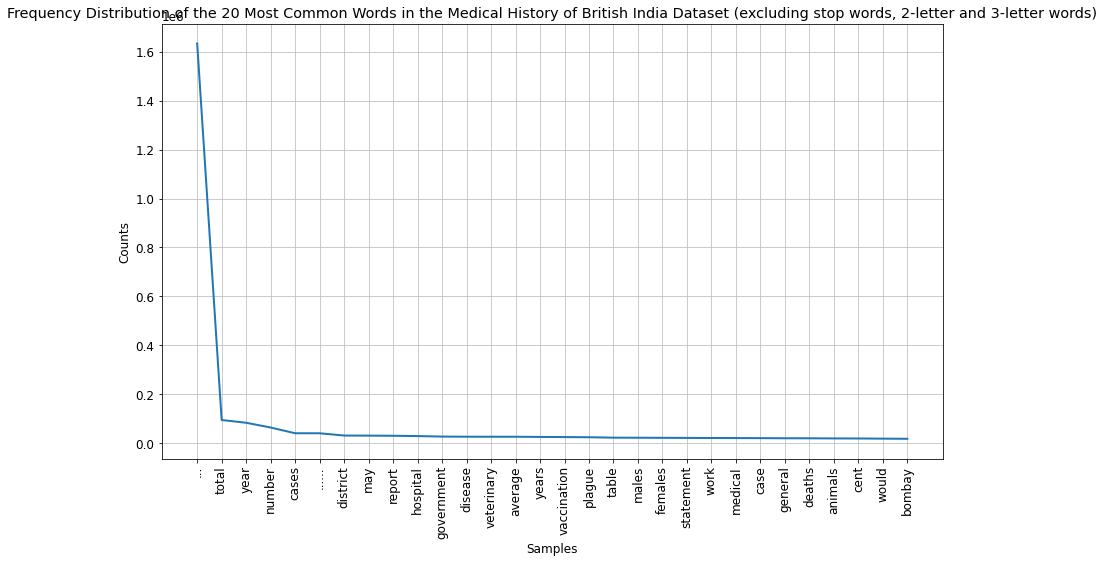

In [28]:
# Visualise the frequency distribution for a select number of tokens
plt.figure(figsize = (14, 8))                # customise the width and height of the plot
plt.rc('font', size=12)                       # customise the font size of the title, axes names, and axes labels
fdist_ft.plot(30, title='Frequency Distribution of the 20 Most Common Words in the Medical History of British India Dataset (excluding stop words, 2-letter and 3-letter words)')

In [29]:
# most common words in the dataset - run this after cleaning for it to be more meaningful
fdist_ft.most_common(50)

[('...', 1634899),
 ('total', 94009),
 ('year', 82764),
 ('number', 63297),
 ('cases', 39875),
 ('......', 39757),
 ('district', 30462),
 ('may', 30145),
 ('report', 29538),
 ('hospital', 28273),
 ('government', 26231),
 ('disease', 25705),
 ('veterinary', 25575),
 ('average', 25560),
 ('years', 24749),
 ('vaccination', 24190),
 ('plague', 23489),
 ('table', 21813),
 ('males', 21500),
 ('females', 21153),
 ('statement', 20794),
 ('work', 20452),
 ('medical', 20124),
 ('case', 19838),
 ('general', 19357),
 ('deaths', 19189),
 ('animals', 18691),
 ('cent', 18427),
 ('would', 17746),
 ('bombay', 17210),
 ('100', 17057),
 ('ganja', 17040),
 ('made', 16728),
 ('department', 16678),
 ('000', 16611),
 ('died', 16548),
 ('india', 16495),
 ('found', 16400),
 ('showing', 16112),
 ('small', 16109),
 ('time', 15958),
 ('previous', 15698),
 ('use', 15089),
 ('patients', 15054),
 ('first', 14565),
 ('treated', 14479),
 ('diseases', 14027),
 ('water', 13633),
 ('cattle', 13546),
 ('three', 13468)]

#### Advanced Text Processing

1. Build n-grams

In [31]:
# from nltk.util import ngrams
# from collections import Counter

#Find bigrams and print the most common 5
bigrams = ngrams(filtered_tokens,2)
print("Most common bigrams : ")
print(Counter(bigrams).most_common(5))

#Find trigrams and print the most common 5
trigrams = ngrams(filtered_tokens,3)
print(" \n Most common trigrams : " )
print(Counter(trigrams).most_common(5))

Most common bigrams : 
[(('...', '...'), 1312200), (('males', 'females'), 17710), (('females', 'total'), 14918), (('......', '......'), 12513), (('total', 'males'), 12420)]
 
 Most common trigrams : 
[(('...', '...', '...'), 1110066), (('males', 'females', 'total'), 14617), (('total', 'males', 'females'), 12271), (('females', 'total', 'males'), 11769), (('graphic', 'appears', 'see'), 7170)]


2. POS Tagging

In [32]:
#download the tagger package
nltk.download('averaged_perceptron_tagger')

#Tag and print the first 10 tokens
nltk.pos_tag(filtered_tokens)[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tamaralottering/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('1111', 'CD'),
 ('sanitary', 'JJ'),
 ('dated', 'VBD'),
 ('ootacamund', 'RB'),
 ('6th', 'CD'),
 ('october', 'JJ'),
 ('1876', 'CD'),
 ('honourable', 'JJ'),
 ('hudleston', 'NN'),
 ('chief', 'NN')]

3. TD-1DF Matrix Building

In [ ]:
# Use scikit-learn library
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#Use a small corpus for each visualization
vector_corpus = [
    'NBA is a Basketball league',
    'Basketball is popular in America.',
    'TV in America telecast BasketBall.',
]

#Create a vectorizer for english language
vectorizer = TfidfVectorizer(stop_words='english')

#Create the vector
tfidf=vectorizer.fit_transform(vector_corpus)

print("Tokens used as features are : ")
print(vectorizer.get_feature_names())

print("\n Size of array. Each row represents a document. Each column represents a feature/token. ")
print(tfidf.shape)

print("\n Actual TF-IDF array")
tfidf.toarray()
